In [ ]:
## here we will try to plot it in tkinter, but we will not use the 
## buttons though
from tkinter import *
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,
NavigationToolbar2Tk)
global flows
flows = []
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
class Uniform:
    flow_type = "uniform"
    def __init__(self, x_direction, y_direction):
        self.x_velocity = np.full((100,100),x_direction)
        self.y_velocity = np.full((100,100),y_direction)
        
        
class Source:
    flow_type = "source"
    def __init__(self, x_pos, y_pos, strength):
        w = 9
        Y, X = np.mgrid[-w:w:100j, -w:w:100j]
        self.x_pos = np.full((100,100),x_pos)
        self.y_pos = np.full((100,100),y_pos)
        self.strength = int(strength)
        V =self.strength*(Y - self.y_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
        U =self.strength*(X - self.x_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
        self.y_velocity = np.where(V !=np.inf, V, 0)
        self.x_velocity = np.where(U !=np.inf, U, 0)
class Vortex:
    flow_type = "vortex"
    def __init__(self, x_pos, y_pos, strength):
        w = 9
        Y, X = np.mgrid[-w:w:100j, -w:w:100j]
        self.x_pos = int(x_pos)
        self.y_pos = int(y_pos)
        self.strength = int(strength)
        V = self.strength*(X - self.x_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
        U = -self.strength*(Y - self.y_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
        self.y_velocity = np.where(V !=np.inf, V, 0)
        self.x_velocity = np.where(U !=np.inf, U, 0)
def blank():
    global flows
    flows = []
    flows.append(Uniform(0,0))
    refresh()
def refresh():
    plt.clf()
    plt.cla()
    fig.clear()
    plt.close()
    #fig = Figure(figsize = (5,5),dpi = 100)
    plot1 = fig.add_subplot(111)
    w = 9
    Y, X = np.mgrid[-w:w:100j, -w:w:100j]
    U = 0
    V = 0
    for i in flows:
        U = U +i.x_velocity
        V = V +i.y_velocity
    speed = np.sqrt(U**2+V**2)
    strm = plot1.streamplot(X,Y,U,V, color =speed, cmap = plt.cm.jet,density = 1)
    plt.show()
    #canvas = FigureCanvasTkAgg(fig,master = window)
    fig.canvas.draw()
    
    #canvas.get_tk_widget().pack(side = BOTTOM)
    #toolbar = NavigationToolbar2Tk(canvas, window)
    #toolbar.update()
    
    #canvas.get_tk_widget().pack(side = BOTTOM)
    
def add_uniform():
    popup = Tk()
    popup.title("uniform flow definition")
    L1 = Label(popup, text="x direcion of the uniform flow")
    L1.grid(row = 0,column = 0)
    x_uniform = Entry(popup, bd =5)
    x_uniform.grid(row = 0,column = 1)
    L2 = Label(popup, text="y direcion of the uniform flow")
    L2.grid(row = 1,column = 0)
    y_uniform = Entry(popup, bd =5)
    y_uniform.grid(row = 1,column = 1)        
    def close_window ():
        global flows
        a = Uniform(float(x_uniform.get()),float(y_uniform.get()))
        flows.append(a)

        refresh()
        popup.destroy()
    button = Button(popup, text = "Okay", command = close_window)
    button.grid(row = 2, column = 1)
    
def add_source():
    popup = Tk()
    popup.title("source flow definition")
    L1 = Label(popup, text="x position of the uniform flow")
    L1.grid(row = 0,column = 0)
    x_pos = Entry(popup, bd =5)
    x_pos.grid(row = 0,column = 1)
    L2 = Label(popup, text="y position of the uniform flow")
    L2.grid(row = 1,column = 0)
    y_pos = Entry(popup, bd =5)
    y_pos.grid(row = 1,column = 1)
    L3 = Label(popup, text = "strength of the source: ")
    L3.grid(row = 2, column = 0)
    strength = Entry(popup,bd =5)
    strength.grid(row = 2, column = 1)
    def close_window ():
        global flows
        a = Source(float(x_pos.get()),float(y_pos.get()),float(strength.get()))
        flows.append(a)
        refresh()
        popup.destroy()
    button = Button(popup, text = "Okay", command = close_window)
    button.grid(row = 3, column = 1)
    
def add_vortex():
    popup = Tk()
    popup.title("Vortex flow definition")
    L1 = Label(popup, text="x position of the vortex")
    L1.grid(row = 0,column = 0)
    x_pos = Entry(popup, bd =5)
    x_pos.grid(row = 0,column = 1)
    L2 = Label(popup, text="y position of the vortex")
    L2.grid(row = 1,column = 0)
    y_pos = Entry(popup, bd =5)
    y_pos.grid(row = 1,column = 1)
    L3 = Label(popup, text = "strength of the vortex: ")
    L3.grid(row = 2, column = 0)
    strength = Entry(popup,bd =5)
    strength.grid(row = 2, column = 1)
    def close_window ():
        global flows
        a = Vortex(float(x_pos.get()),float(y_pos.get()),float(strength.get()))
        flows.append(a)
        refresh()
        popup.destroy()
    button = Button(popup, text = "Okay", command = close_window)
    button.grid(row = 3, column = 1)
window =Tk()
window.title("Potential flows")

window.geometry("500x500")

uniform_button = Button(master = window,
                       command = add_uniform,
                       height = 2,
                       width = 10,
                       text = "Uniform")
refresh_button = Button(master = window,
                        command = blank,
                        height = 2,
                        width = 10,
                        text = "refresh")
source_button = Button(master = window,
                       command = add_source,
                       height = 2,
                       width = 10,
                       text = "Source")
vortex_button = Button(master = window,
                       command = add_vortex,
                       height = 2,
                       width = 10,
                       text = "Vortex")
uniform_button.pack(side = TOP)
source_button.pack(side = TOP)
vortex_button.pack(side = TOP)
refresh_button.pack(side = TOP)
fig = Figure(figsize = (5,5),dpi = 100)
canvas = FigureCanvasTkAgg(fig,master = window)
fig.canvas.draw()
canvas.get_tk_widget().pack(side = BOTTOM)
toolbar = NavigationToolbar2Tk(canvas, window)
toolbar.update()
    
canvas.get_tk_widget().pack(side = BOTTOM)
window.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\users\anees\appdata\local\programs\python\python37\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-1-cf0329511bd7>", line 47, in blank
    refresh()
  File "<ipython-input-1-cf0329511bd7>", line 63, in refresh
    strm = plot1.streamplot(X,Y,U,V, color =speed, cmap = plt.cm.jet,density = 1)
  File "c:\users\anees\appdata\local\programs\python\python37\lib\site-packages\matplotlib\__init__.py", line 1438, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "c:\users\anees\appdata\local\programs\python\python37\lib\site-packages\matplotlib\streamplot.py", line 222, in streamplot
    lc.set_array(np.ma.hstack(line_colors))
  File "c:\users\anees\appdata\local\programs\python\python37\lib\site-packages\numpy\ma\extras.py", line 291, in __call__
    _d = func(tuple([np.asarray(a) for a in x]), *args, **params)
  File "<__array_function__ in

In [ ]:
a = np.asarray([1,3])
b = np.asarray([1,4])
sqrt = np.sqrt(a**2 +b**2)
print(sqrt)

[1.41421356 5.        ]


you pressed MouseButton.LEFT 0.588410991636798 0.4736938925680647


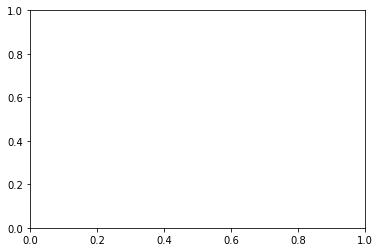

In [ ]:
import tkinter
from tkinter import *

from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
import matplotlib.pyplot as plt


import numpy as np
global fig, ax

root = tkinter.Tk()
root.wm_title("Embedding in Tk")

fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, master=root) 
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
global flows
flows = []


def on_press(event):
    print('you pressed', event.button, event.xdata, event.ydata)

fig.canvas.mpl_connect('button_press_event', on_press)


def _quit():
    root.quit()     # stops mainloop
    root.destroy()  # this is necessary on Windows to prevent
                    # Fatal Python Error: PyEval_RestoreThread: NULL tstate

def add_uniform():
    top = Tk()
    L1 = Label(top, text="x direcion of the uniform flow")
    L1.grid(row = 0,column = 0)
    x_uniform = Entry(top, bd =5)
    x_uniform.grid(row = 0,column = 1)
    L2 = Label(top, text="y direcion of the uniform flow")
    L2.grid(row = 1,column = 0)
    y_uniform = Entry(top, bd =5)
    y_uniform.grid(row = 1,column = 1)
    
    
    def close_window (): 
        a = Uniform(x_uniform.get(), y_uniform.get())
        top.destroy()
    button = Button (top, text = "Okay", command = close_window)
    button.grid(row = 2, column = 1)
    
    a = Uniform(x_uniform.get(), y_uniform.get())
    flows.append(a)
    refresh()
    #    uniform
def add_source():
    top = Tk()
    L1 = Label(top, text="strength of the uniform flow")
    L1.grid(row = 0,column = 0)
    x_uniform = Entry(top, bd =5)
    x_uniform.grid(row = 0,column = 1)
    L2 = Label(top, text="2sdaf")
    L2.grid(row = 1,column = 0)
    y_uniform = Entry(top, bd =5)
    y_uniform.grid(row = 1,column = 1)
    
    
    def close_window (): 
        print(x_uniform.get(), y_uniform.get())
        top.destroy()
    button = Button(top, text = "Okay", command = close_window)
    button.grid(row = 2, column = 1)
    
    
def refresh():
    x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))
    u = 0
    v = 0
    for i in flows:
        u = u + int(i.x_direction)
        v = v + int(i.y_direction)
    fig, ax = plt.subplots()
    q = ax.quiver(x,y,u,v)


    

button = tkinter.Button(master=root, text="Quit", command=_quit)
uniform_button = tkinter.Button(master=root, text = "Uniform Flow", command =add_uniform)
source_button = tkinter.Button(master = root, text = "source flow", command =add_source)
button.pack(side=tkinter.LEFT)
uniform_button.pack(side = tkinter.LEFT)
source_button.pack(side = tkinter.LEFT)

tkinter.mainloop()
# If you put root.destroy() here, it will cause an error if the window is
# closed with the window manager.

##defining all the flows as classes
class Uniform:
    flow_type = "Uniform"
    def __init__(self, x_direction,y_direction):
        self.x_direction = x_direction
        self.y_direction = y_direction
        
        
        
class Source:
    flow_type = "Source"
    def __init__(self, strength, x_pos, y_pos):
        self.sterngth = strength
        self.x_pos = x_pos
        self.y_pos = y_pos

    

In [ ]:
ax.plot(1,2)


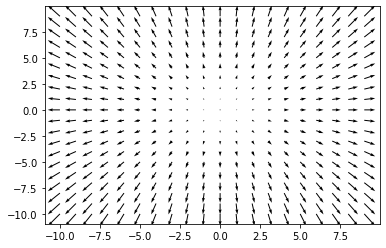

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

In [ ]:
# a single flow plotting( we choose a uniform flow for a starting point)
import numpy as np
import matplotlib.pyplot as plt
global flows
flows = []
class Uniform:
    flow_type = "Uniform"
    def __init__(self, x_direction,y_direction):
        self.x_velocity = x_direction
        self.y_velocity = y_direction
        
        
        
class Source:
    flow_type = "source"
    def __init__(self, x_pos, y_pos, strength):
        w = 9
        Y, X = np.mgrid[-w:w:100j, -w:w:100j]
        self.x_pos = np.full((100,100),x_pos)
        self.y_pos = np.full((100,100),y_pos)
        self.strength = int(strength)
        V =self.strength*(Y - self.y_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
        U =self.strength*(X - self.x_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
        self.y_velocity = np.where(V !=np.inf, V, 0)
        self.x_velocity = np.where(U !=np.inf, U, 0)
        
a = Uniform(3,5)
flows.append(a)
b = Source(0,0,5)
flows.append(b)
#type(flows[0].x_direction)

def refresh():
    x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))
    u = 0
    v = 0
    for i in flows:
        u = u + np.full((10,10),int(i.x_velocity))
        v = v + np.full((10,10),int(i.y_velocity))
    fig, ax = plt.subplots()
    q = ax.quiver(x,y,u,v)
refresh()

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))
print(x.shape)

(10, 10)


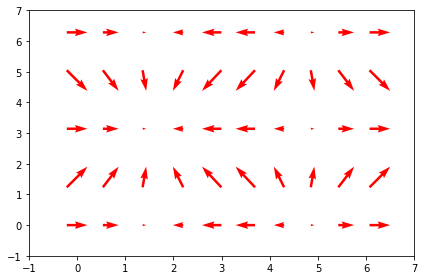

In [ ]:
# animating a aquiver(example)

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

X, Y = np.mgrid[:2*np.pi:10j,:2*np.pi:5j]
U = np.cos(X)
V = np.sin(Y)

fig, ax = plt.subplots(1,1)
Q = ax.quiver(X, Y, U, V, pivot='mid', color='r', units='inches')

ax.set_xlim(-1, 7)
ax.set_ylim(-1, 7)

def update_quiver(num, Q, X, Y):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    U = np.cos(X + num*0.1)
    V = np.sin(Y + num*0.1)

    Q.set_UVC(U,V)

    return Q,

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, X, Y),
                               interval=5, blit=True)
fig.tight_layout()
plt.show()

In [ ]:
import tkinter
from tkinter import *

from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
import matplotlib.pyplot as plt


import numpy as np
fig, ax = plt.subplots()
root = tkinter.Tk()
root.wm_title("Embedding in Tk")

fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, master=root) 
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

def on_press(event):
    print('you pressed', event.button, event.xdata, event.ydata)

fig.canvas.mpl_connect('button_press_event', on_press)
def add_source():
    pass
def add_uniform():
    pass
def _quit():
    root.quit()     # stops mainloop
    root.destroy()  # this is necessary on Windows to prevent
                    # Fatal Python Error: PyEval_RestoreThread: NULL tstate
button = tkinter.Button(master=root, text="Quit", command=_quit)
uniform_button = tkinter.Button(master=root, text = "Uniform Flow", command =add_uniform)
source_button = tkinter.Button(master = root, text = "source flow", command =add_source)
button.pack(side=tkinter.LEFT)
uniform_button.pack(side = tkinter.LEFT)
source_button.pack(side = tkinter.LEFT)
X, Y = np.mgrid[:2*np.pi:10j,:2*np.pi:5j]
U = np.cos(X)
V = np.sin(Y)
def plot_new():
    i = 0
    while True:

        ax.quiver(X,Y,U+i*0.1,V+i*0.1)
        print("plotted")
        i = i+1
plot_new()
tkinter.mainloop()

In [ ]:
## here we will make a list of flows, for starters only uniform, 
## and we will use the next function to plot the streamlines
import numpy as np
import matplotlib.pyplot as plt
class uniform:
    flow_type = "uniform"
    def __init__(self, x_direction, y_direction):
        self.x_velocity = np.full((100,100),x_direction)
        self.y_velocity = np.full((100,100),y_direction)
        
class source:
    flow_type = "source"
    def __init__(self, x_pos, y_pos, strength):
        w = 9
        Y, X = np.mgrid[-w:w:100j, -w:w:100j]
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.strength = strength
        self.y_velocity = self.strength*(Y - self.y_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
        self.x_velocity = self.strength*(X - self.x_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
class vortex:
    flow_type = "vortex"
    def __init__(self, x_pos, y_pos, strength):
        w = 9
        Y, X = np.mgrid[-w:w:100j, -w:w:100j]
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.strength = strength
        self.y_velocity = self.strength*(X - self.x_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
        self.x_velocity = -self.strength*(Y - self.y_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
global flows
flows = []
a = source(0,0,10)
flows.append(a)

a = source(0.001,0,-10)
flows.append(a)

#a = uniform(1,0)
#flows.append(a)

#a = vortex(0,0,5)
#flows.append(a)


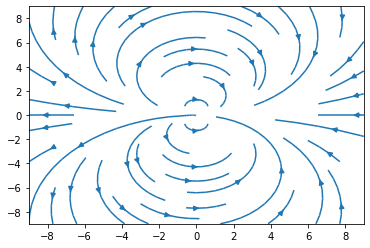

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
w = 9
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = 0
V = 0
for i in flows:
    U = U +i.x_velocity
    V = V +i.y_velocity
fig, ax = plt.subplots()
ax.streamplot(X,Y,U,V, density = 0.5)

In [ ]:
w = 9
X,Y = np.mgrid[-w:w:100j,-w:w:100j]
X.shape

(100, 100)

In [ ]:
import numpy as np
a = np.zeros((100,100))
print(a)
print(a.shape)
print(np.pi)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 100)
3.141592653589793


In [ ]:
## here we will try to plot it in tkinter, but we will not use the 
## buttons though
from tkinter import *
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,
NavigationToolbar2Tk)

flows = []
import numpy as np
import matplotlib.pyplot as plt
class Uniform:
    flow_type = "uniform"
    def __init__(self, x_direction, y_direction):
        self.x_velocity = np.full((100,100),x_direction)
        self.y_velocity = np.full((100,100),y_direction)
        
class Source:
    flow_type = "source"
    def __init__(self, x_pos, y_pos, strength):
        w = 9
        Y, X = np.mgrid[-w:w:100j, -w:w:100j]
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.strength = strength
        self.y_velocity = self.strength*(Y - self.y_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
        self.x_velocity = self.strength*(X - self.x_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
class Vortex:
    flow_type = "vortex"
    def __init__(self, x_pos, y_pos, strength):
        w = 9
        Y, X = np.mgrid[-w:w:100j, -w:w:100j]
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.strength = strength
        self.y_velocity = self.strength*(X - self.x_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
        self.x_velocity = -self.strength*(Y - self.y_pos)/(2*np.pi*((Y - self.y_pos)**2 + (X - self.x_pos)**2))
def plot():
    fig = Figure(figsize = (5,5),dpi = 100)
    plot1 = fig.add_subplot(111)
    w = 9
    Y, X = np.mgrid[-w:w:100j, -w:w:100j]
    U = 0
    V = 0
    global flows
    for i in flows:
        U = U +i.x_velocity
        V = V +i.y_velocity
    plot1.streamplot(X,Y,U,V, density = 0.5)
    canvas = FigureCanvasTkAgg(fig,master = window)
    canvas.draw()
    
    canvas.get_tk_widget().pack(side = BOTTOM)
    toolbar = NavigationToolbar2Tk(canvas, window)
    toolbar.update()
    
    canvas.get_tk_widget().pack(side = BOTTOM)
    
def add_uniform():
    popup = Tk()
    popup.title("uniform flow definition")
    L1 = Label(popup, text="x direcion of the uniform flow")
    L1.grid(row = 0,column = 0)
    x_uniform = Entry(popup, bd =5)
    x_uniform.grid(row = 0,column = 1)
    L2 = Label(popup, text="y direcion of the uniform flow")
    L2.grid(row = 1,column = 0)
    y_uniform = Entry(popup, bd =5)
    y_uniform.grid(row = 1,column = 1)        
    def close_window ():
        a = Uniform(int(x_uniform.get()),int(y_uniform.get()))
        flows.append(a)
        print(x_uniform.get(), y_uniform.get())
        plot()
        popup.destroy()
    button = Button(popup, text = "Okay", command = close_window)
    button.grid(row = 2, column = 1)
    
def add_source():
    popup = Tk()
    popup.title("source flow definition")
    L1 = Label(popup, text="x position of the uniform flow")
    L1.grid(row = 0,column = 0)
    x_pos = Entry(popup, bd =5)
    x_pos.grid(row = 0,column = 1)
    L2 = Label(popup, text="y position of the uniform flow")
    L2.grid(row = 1,column = 0)
    y_pos = Entry(popup, bd =5)
    y_pos.grid(row = 1,column = 1)
    L3 = Label(popup, text = "strength of the source: ")
    L3.grid(row = 2, column = 0)
    strength = Entry(popup,bd =5)
    strength.grid(row = 2, column = 1)
    def close_window ():
        a = Source(int(x_pos.get()),int(y_pos.get()),int(strength.get()))
        flows.append(a)
        plot()
        popup.destroy()
    button = Button(popup, text = "Okay", command = close_window)
    button.grid(row = 3, column = 1)
    
def add_vortex():
    popup = Tk()
    popup.title("Vortex flow definition")
    L1 = Label(popup, text="x position of the vortex")
    L1.grid(row = 0,column = 0)
    x_pos = Entry(popup, bd =5)
    x_pos.grid(row = 0,column = 1)
    L2 = Label(popup, text="y position of the vortex")
    L2.grid(row = 1,column = 0)
    y_pos = Entry(popup, bd =5)
    y_pos.grid(row = 1,column = 1)
    L3 = Label(popup, text = "strength of the vortex: ")
    L3.grid(row = 2, column = 0)
    strength = Entry(popup,bd =5)
    strength.grid(row = 2, column = 1)
    def close_window ():
        a = Vortex(int(x_pos.get()),int(y_pos.get()),int(strength.get()))
        flows.append(a)
        plot()
        popup.destroy()
    button = Button(popup, text = "Okay", command = close_window)
    button.grid(row = 3, column = 1)
window =Tk()
window.title("Potential flows")

window.geometry("500x500")

refresh_button = Button(master = window,
                       command = plot,
                       height = 2,
                       width = 10,
                       text = "Refresh")
uniform_button = Button(master = window,
                       command = add_uniform,
                       height = 2,
                       width = 10,
                       text = "Uniform")
source_button = Button(master = window,
                       command = add_source,
                       height = 2,
                       width = 10,
                       text = "Source")
vortex_button = Button(master = window,
                       command = add_vortex,
                       height = 2,
                       width = 10,
                       text = "Vortex")
uniform_button.pack(side = TOP)
refresh_button.pack(side = TOP)
source_button.pack(side = TOP)
vortex_button.pack(side = TOP)

window.mainloop()


In [ ]:
import tkinter as tk

a = Tk()
a.title("trial")
c = Entry(a)
c.pack()
def plot():
    e = c.get()
    print(e)
    a.destroy()
refresh_button = Button(master = a,
                       command = plot,
                       height = 2,
                       width = 10,
                       text = "Re")
refresh_button.pack()
print(c)
a.mainloop()

.!entry
sadf


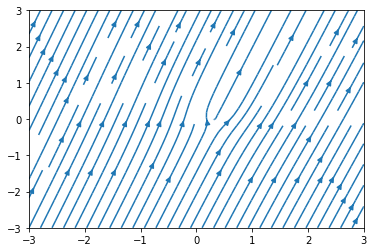

In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
U = 0
V = 0
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
for i in flows:
    U= U+i.x_velocity
    V = V +i.y_velocity
ax2.streamplot(X,Y,U,V)


In [ ]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox


fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)

t = np.arange(-2.0, 2.0, 0.001)
l, = ax.plot(t, np.zeros_like(t), lw=2)


def submit(expression):
    """
    Update the plotted function to the new math *expression*.

    *expression* is a string using "t" as its independent variable, e.g.
    "t ** 3".
    """
    ydata = eval(expression)
    l.set_ydata(ydata)
    ax.relim()
    ax.autoscale_view()
    plt.draw()


axbox = fig.add_axes([0.1, 0.05, 0.8, 0.075])
text_box = TextBox(axbox, "Evaluate")
text_box.on_submit(submit)
text_box.set_val("t ** 2")  # Trigger `submit` with the initial string.

plt.show()

<IPython.core.display.Javascript object>

# third attempt
here I will try to make the points draggable so that I can make an interactive plot
- it is tried from a github [yuma-m](https://github.com/yuma-m/matplotlib-draggable-plot)


In [3]:
import math

import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseEvent


class DraggablePlotExample(object):
    u""" An example of plot with draggable markers """

    def __init__(self):
        self._figure, self._axes, self._line = None, None, None
        self._dragging_point = None
        self._points = {}

        self._init_plot()

    def _init_plot(self):
        self._figure = plt.figure("Example plot")
        axes = plt.subplot(1, 1, 1)
        axes.set_xlim(0, 100)
        axes.set_ylim(0, 100)
        axes.grid(which="both")
        self._axes = axes

        self._figure.canvas.mpl_connect('button_press_event', self._on_click)
        self._figure.canvas.mpl_connect('button_release_event', self._on_release)
        self._figure.canvas.mpl_connect('motion_notify_event', self._on_motion)
        plt.show()

    def _update_plot(self):
        if not self._points:
            self._line.set_data([], [])
        else:
            x, y = zip(*sorted(self._points.items()))
            # Add new plot
            if not self._line:
                self._line, = self._axes.plot(x, y, "b", marker="o", markersize=10)
            # Update current plot
            else:
                self._line.set_data(x, y)
        self._figure.canvas.draw()

    def _add_point(self, x, y=None):
        if isinstance(x, MouseEvent):
            x, y = int(x.xdata), int(x.ydata)
        self._points[x] = y
        return x, y

    def _remove_point(self, x, _):
        if x in self._points:
            self._points.pop(x)

    def _find_neighbor_point(self, event):
        u""" Find point around mouse position
        :rtype: ((int, int)|None)
        :return: (x, y) if there are any point around mouse else None
        """
        distance_threshold = 3.0
        nearest_point = None
        min_distance = math.sqrt(2 * (100 ** 2))
        for x, y in self._points.items():
            distance = math.hypot(event.xdata - x, event.ydata - y)
            if distance < min_distance:
                min_distance = distance
                nearest_point = (x, y)
        if min_distance < distance_threshold:
            return nearest_point
        return None

    def _on_click(self, event):
        u""" callback method for mouse click event
        :type event: MouseEvent
        """
        # left click
        if event.button == 1 and event.inaxes in [self._axes]:
            point = self._find_neighbor_point(event)
            if point:
                self._dragging_point = point
            else:
                self._add_point(event)
            self._update_plot()
        # right click
        elif event.button == 3 and event.inaxes in [self._axes]:
            point = self._find_neighbor_point(event)
            if point:
                self._remove_point(*point)
                self._update_plot()

    def _on_release(self, event):
        u""" callback method for mouse release event
        :type event: MouseEvent
        """
        if event.button == 1 and event.inaxes in [self._axes] and self._dragging_point:
            self._dragging_point = None
            self._update_plot()

    def _on_motion(self, event):
        u""" callback method for mouse motion event
        :type event: MouseEvent
        """
        if not self._dragging_point:
            return
        if event.xdata is None or event.ydata is None:
            return
        self._remove_point(*self._dragging_point)
        self._dragging_point = self._add_point(event)
        self._update_plot()


if __name__ == "__main__":
    plot = DraggablePlotExample()

ModuleNotFoundError: No module named 'matplotlib'